<a href="https://colab.research.google.com/github/gauriagarwal18/Hotel_Booking_Analysis/blob/master/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b>HOTEL BOOKING ANALYSIS<b>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [77]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading CSV file from google drive in colab enviroment
We will first load our csv file in which data is stored to the colab enviroment in data frame format so that we can perform the required cleaning and analysis.



In [78]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/My Drive/AlmaBetter_Capstone_projects/Capstone_project1_eda/Hotel Bookings.csv"
hotels_original=pd.read_csv(path)
hotels=hotels_original.copy()
type(hotels)  #the type of hotels if of pandas dataframe type

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas.core.frame.DataFrame

In [79]:
#first five columns of data to have a general view how the data looks like.
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#DATA DESCRIPTION

The data set is a combination of different types of variables among which some are categorical variables and the others are discrete variables.

To make required analysis from the given raw data we have to perform following steps:

**step1 [Understanding the data deeply]**: Read the data thoroughly and understand the connections between different attributes

**step2 [Data Cleaning]**: This data is raw data so it contains lot of noise and null values so we  have to remove it for proper analysis with minimum or no error.

**step3 [Analysing and Concluding]**: After data cleaing, data is ready for further analysis, so we make required analysis and visulisation for various attributes of data and for required combinations of attributes of data.




##Details of data

In [80]:
hotels.info() #information about all the attribute present in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [81]:
hotels.describe(include = ['object']) #a brief description of all the categorical variables
"""
from this we can make conclusions like
- city hotels are preferred over resort hotels
- Maximum customers arrives in august
- total number of meals available are 5
etc etc.....
"""

'\nfrom this we can make conclusions like\n- city hotels are preferred over resort hotels\n- Maximum customers arrives in august\n- total number of meals available are 5\netc etc.....\n'

##DATA CLEANING
For data cleaning:

- We removed the duplicate rows.
- We remove rows and columns having more than 80% of entries unavailable(null).
- We replace the remaing null values with the best possible values.
- As in this data none of the attribute is continuous so there is no need to remove outliers, as we don't perform visulisation through mean or median.

Now after making required cleaning the data is ready for visualisation

In [82]:
print(f"shape of data before cleaning: {hotels.shape}")

shape of data before cleaning: (119390, 32)


In [83]:
#to print the percentage of null values in each column
null_percent=pd.Series()
for col in hotels.columns:
  null_percent[col]=((hotels.shape[0]-hotels[col].count())/(hotels.shape[0]))*100
print(null_percent)
#we note that only 4 attributes have null values and company have more than 90% of the values null.

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [85]:
#preserving columns having at least 20% of not null values
hotels.dropna(axis=1,inplace=True,thresh=(0.2*hotels.shape[0]))

#preserving rows having at least 20% of not null values
hotels.dropna(axis=0,inplace=True,thresh=(0.2*hotels.shape[1]))

#the columns named company and some rows will get deleted from the dataset.

In [86]:
# replacing Nan value from chidren and agent columns with 0
hotels['children'].fillna(0, inplace = True)   #we assume if the number of childrens are not available than there is a high probabilty that it is 0.
hotels['agent'].fillna(0, inplace = True)      #if agent id is not available we assume it to ne 0 which means an intermediate agent is not involved.

In [87]:
# replacing Nan value of country column and consider that those contries are some other countries which are not of that much important
hotels['country'].fillna('other', inplace = True)      

In [88]:
#null percentage after cleaning data
null_percentage = (hotels.isnull().sum()/len(hotels))*100
null_percentage

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [89]:
print(f"shape of data after cleaning: {hotels.shape}")

shape of data after cleaning: (119390, 31)


#EDA

#Naman garg

In [90]:
# PI chart for Country
# Bar graph For Months
# Bar graph chart for market_segment
# reserved_room_type


# megha

#saurav

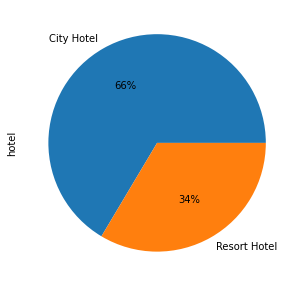

In [91]:
# which type of hotel book more
hotel_type = hotels['hotel'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**
Tourist prefer generally city hotel, rather than resort hotel.

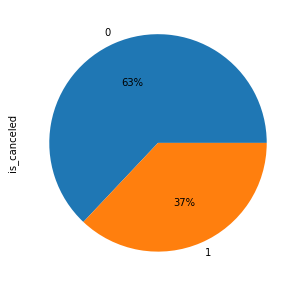

In [92]:
# canceling hotel booking
hotel_type = hotels['is_canceled'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**
About 27% reservation in hotels is cancel after booking.

Text(0.5, 1.0, 'cancel_percentage')

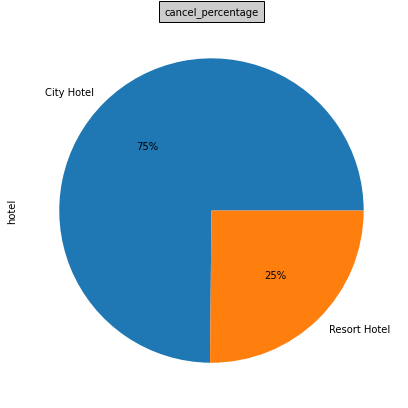

In [93]:
#try to convert whole senerio into bargraph
canceled_hotel = hotels.loc[hotels['is_canceled'] == 1, 'hotel'].value_counts()
canceled_hotel.plot(kind = 'pie',figsize = (7,7),autopct='%1.0f%%')
plt.title('cancel_percentage',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)

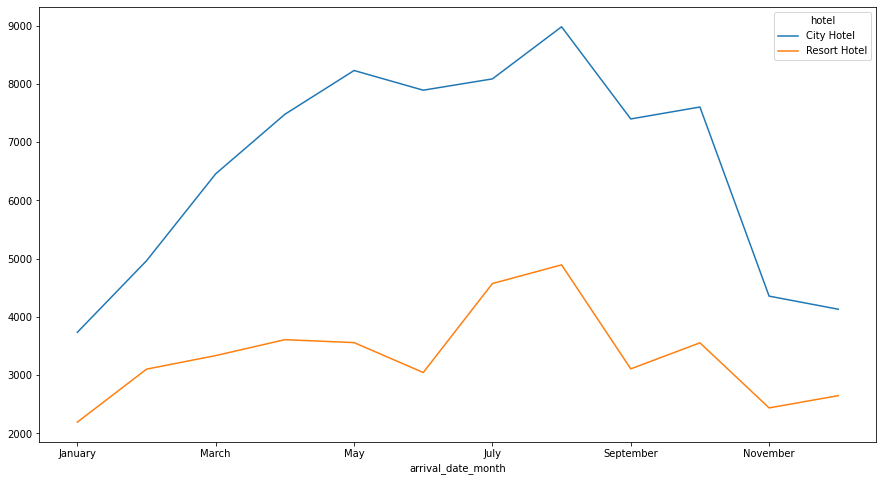

In [94]:
#In which month, hotel booking is maximum and minimum 
arrival_months = pd.crosstab(hotels['arrival_date_month'],hotels['hotel'])
arrival_months = arrival_months.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
arrival_months.plot(kind = 'line', y = ['City Hotel','Resort Hotel'], figsize=(15,8))

INFERENCE: 


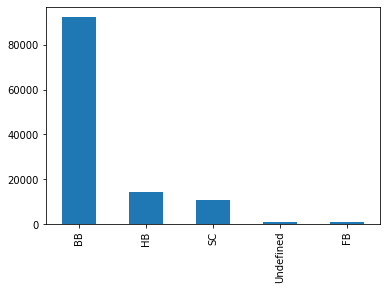

In [95]:
hotels['meal'].unique()
hotels['meal'].value_counts().plot(kind = 'bar')


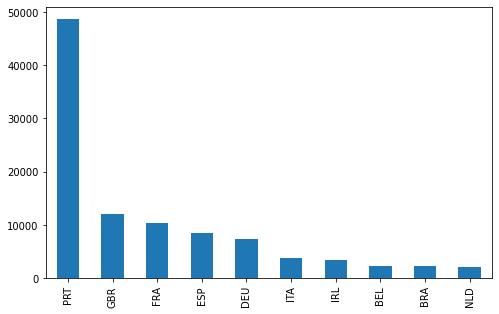

In [96]:
hotels['country'].unique()
max_country = hotels['country'].value_counts().sort_values(ascending = False).head(10)
max_country.plot(kind = 'bar',figsize = (8,5))

In [97]:
segment_cancel=pd.crosstab(hotels["market_segment"],hotels["is_canceled"])
segment_cancel['total_booking_per'] = segment_cancel[0]+segment_cancel[1]
segment_cancel[0] = round((segment_cancel[0]/segment_cancel['total_booking_per'])*100,2)
segment_cancel[1] = round((segment_cancel[1]/segment_cancel['total_booking_per'])*100,2)
segment_cancel

is_canceled,0,1,total_booking_per
market_segment,,,
Aviation,78.06,21.94,237
Complementary,86.94,13.06,743
Corporate,81.27,18.73,5295
Direct,84.66,15.34,12606
Groups,38.94,61.06,19811
Offline TA/TO,65.68,34.32,24219
Online TA,63.28,36.72,56477
Undefined,0.00,100.00,2


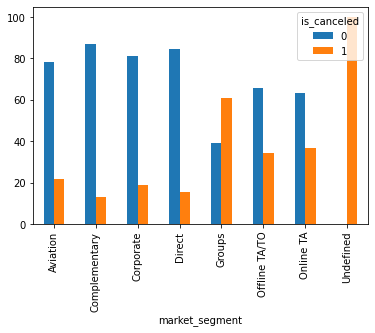

In [98]:
segment_cancel.plot(kind = 'bar',y = [0,1])

In [99]:
hotel_adr = hotels.groupby('hotel')['adr'].mean()

Text(0.5, 0, 'Hotel')

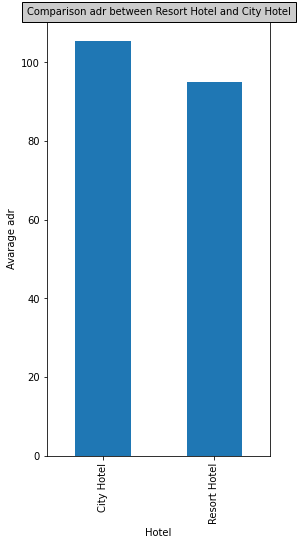

In [100]:
hotel_adr.plot(kind = 'bar',figsize =(4,8))
plt.title('Comparison adr between Resort Hotel and City Hotel',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)
plt.ylabel('Avarage adr')
plt.xlabel('Hotel')

**INFERENCE:**

City Hotel generates more revenue than resort hotel

In [101]:
monthly_adr =hotels.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()
monthly_adr = monthly_adr.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,82.628986,49.461883
February,85.088278,55.171930
March,92.643116,57.520147
April,111.251838,77.849496
May,121.638560,78.758134
June,119.074341,110.444749
July,110.734292,155.181299
August,114.680455,186.790574
September,110.004661,93.252030


In [102]:
monthly_adr['percentage_diff'] = round((abs(monthly_adr['City Hotel'] - monthly_adr['Resort Hotel'])/(monthly_adr['City Hotel'] + monthly_adr['Resort Hotel']))*100,2)
monthly_adr

hotel,City Hotel,Resort Hotel,percentage_diff
arrival_date_month,,,
January,82.628986,49.461883,25.11
February,85.088278,55.171930,21.33
March,92.643116,57.520147,23.39
April,111.251838,77.849496,17.66
May,121.638560,78.758134,21.40
June,119.074341,110.444749,3.76
July,110.734292,155.181299,16.71
August,114.680455,186.790574,23.92
September,110.004661,93.252030,8.24


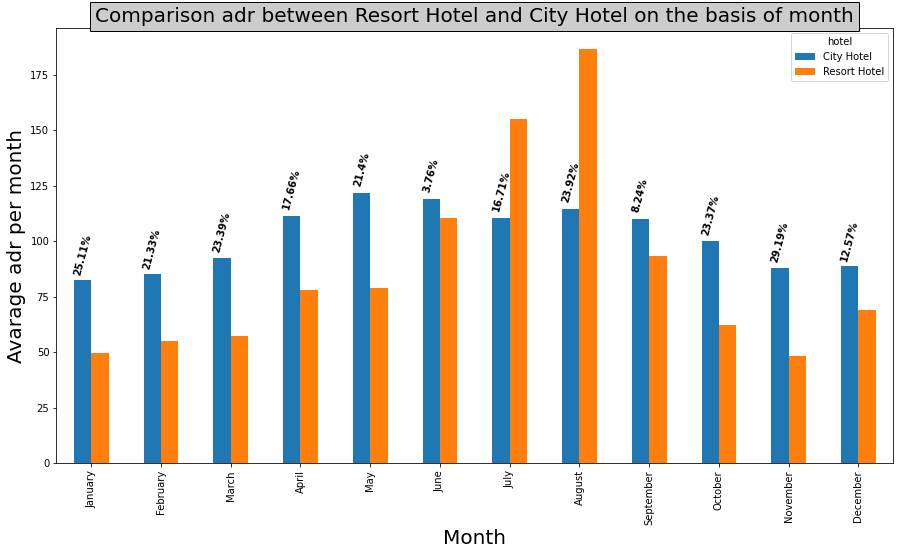

In [103]:
monthly_adr_graph = monthly_adr.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize =(15,8))
plt.title('Comparison adr between Resort Hotel and City Hotel on the basis of month',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('Avarage adr per month',fontsize = 20)
plt.xlabel('Month',fontsize = 20)

i = 0
for p in monthly_adr_graph.patches[0:12]:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.03,str(monthly_adr.percentage_diff[i])+'%',ha='center',weight='bold',rotation=75)
  i+=1
plt.show()


**INFERENCE:**



In [104]:
hotels['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [105]:
market_segment_adr = hotels.groupby('market_segment')['adr'].mean()
market_segment_adr

market_segment
Aviation         100.142110
Complementary      2.886366
Corporate         69.358952
Direct           115.445175
Groups            79.479472
Offline TA/TO     87.354783
Online TA        117.197063
Undefined         15.000000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

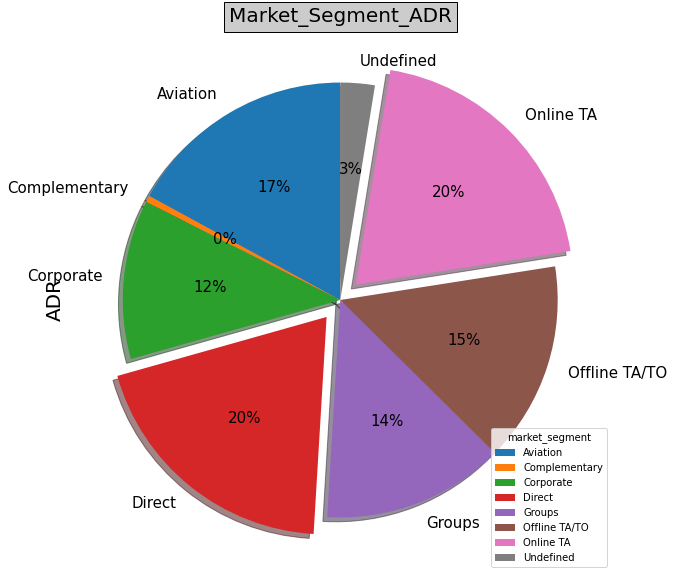

In [106]:
explode = [0,0,0,0.1,0,0,0.1,0]
market_segment_adr.plot(kind = 'pie', y = 'market_segment', autopct='%1.0f%%', figsize =(15,10),explode = explode, shadow = True,startangle = 90, fontsize = 15)
plt.legend(title ='market_segment',loc ='lower right')
plt.title('Market_Segment_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [107]:
hotels['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [108]:
distribution_channel_adr = hotels.groupby('distribution_channel')['adr'].mean()
distribution_channel_adr

distribution_channel
Corporate     69.325204
Direct       106.654983
GDS          120.554301
TA/TO        103.292866
Undefined     46.240000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

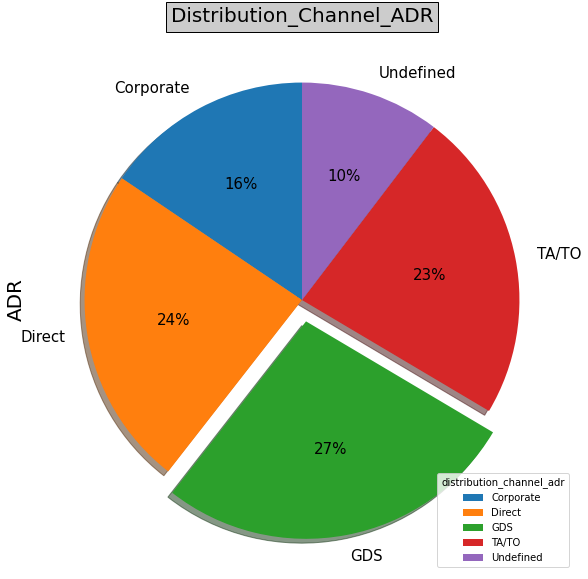

In [109]:
expolde_1 = [0,0,0.1,0,0]
distribution_channel_adr.plot(kind = 'pie', y = 'distribution_channel', autopct='%1.0f%%', figsize =(15,10),explode = expolde_1, shadow = True,startangle = 90,fontsize = 15)
plt.legend(title ='distribution_channel_adr',loc ='lower right')
plt.title('Distribution_Channel_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [110]:
hotels['total_guest'] = hotels['adults'] + hotels['children']
hotels['day_stay'] =hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights']

In [111]:
guest_number = hotels.loc[hotels['total_guest'] <= 5,['adr','total_guest']]
guest_wise_adr = guest_number.groupby('total_guest')['adr'].mean()

Text(0.5, 0, 'Number_of_guest')

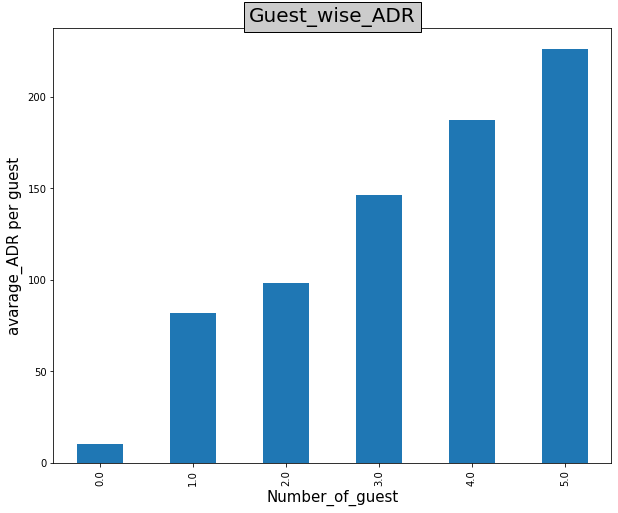

In [112]:
guest_wise_adr.plot(kind = 'bar',figsize = (10,8))
plt.title('Guest_wise_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('avarage_ADR per guest', fontsize = 15)
plt.xlabel('Number_of_guest',fontsize = 15)

In [113]:
#outliers - Consider the number of guest greater than 5 as outliers as there adr is 0
hotels.loc[hotels['total_guest'] > 5,['adr','total_guest','hotel']]


,adr,total_guest,hotel
328,133.16,12.0,Resort Hotel
1539,0.00,40.0,Resort Hotel
1587,0.00,26.0,Resort Hotel
1643,0.00,50.0,Resort Hotel
1752,0.00,26.0,Resort Hotel
1884,0.00,26.0,Resort Hotel
1917,0.00,27.0,Resort Hotel
1962,0.00,27.0,Resort Hotel
2003,0.00,26.0,Resort Hotel
2164,0.00,26.0,Resort Hotel


In [114]:
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,331.0,384.0
1,13272.0,7748.0
2,21426.0,6217.0
3,21381.0,5695.0
4,12557.0,4826.0


Text(0, 0.5, 'ADR')

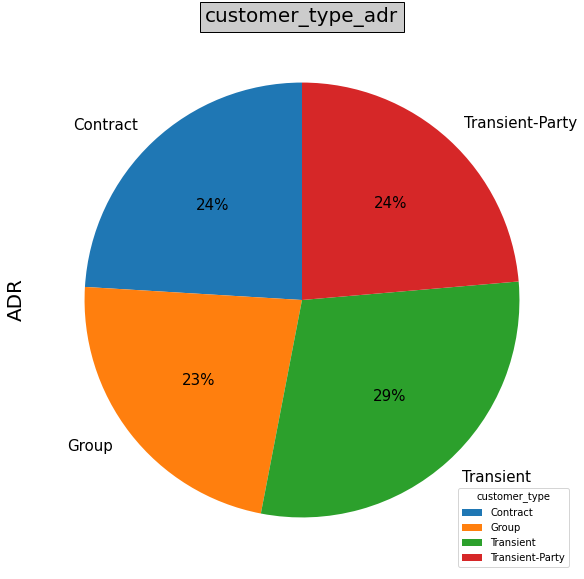

In [115]:
customer_type_adr = hotels.groupby('customer_type')['adr'].mean()
customer_type_adr.plot(kind = 'pie', y = 'customer_type', autopct='%1.0f%%', figsize =(15,10),explode = None,startangle = 90,fontsize = 15)
plt.legend(title ='customer_type',loc ='lower right')
plt.title('customer_type_adr',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [116]:
# retention = hotels.loc[hotels['is_repeated_guest'] == 1]
retention_market_segment = pd.crosstab(hotels['market_segment'],hotels['is_repeated_guest'])
retention_market_segment['retention_rate'] = round((retention_market_segment[1]/(retention_market_segment[0]+retention_market_segment[1])*100),2)
retention_market_segment

is_repeated_guest,0,1,retention_rate
market_segment,,,
Aviation,173,64,27.00
Complementary,513,230,30.96
Corporate,3821,1474,27.84
Direct,11810,796,6.31
Groups,19541,270,1.36
Offline TA/TO,23840,379,1.56
Online TA,55880,597,1.06
Undefined,2,0,0.00


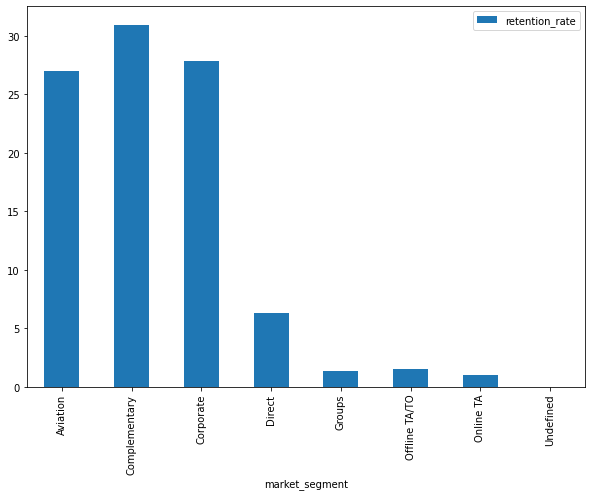

In [117]:
retention_market_segment.plot(kind = 'bar', y = 'retention_rate', figsize = (10,7))

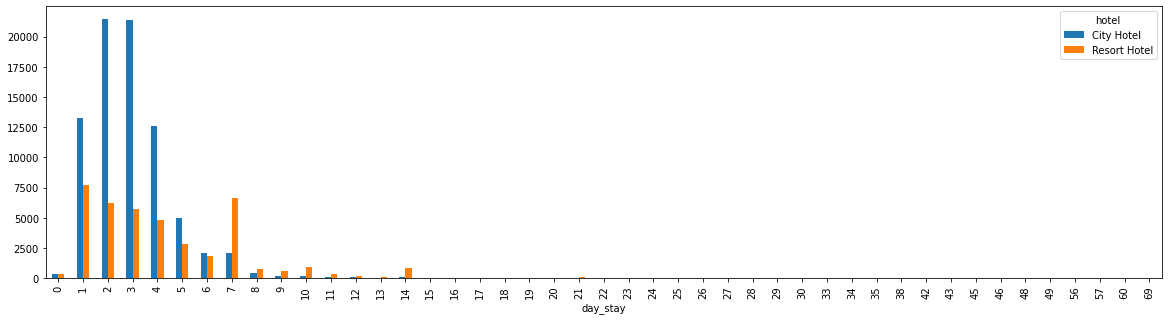

In [118]:
Hotels_stay.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'],figsize =(20,5))

In [119]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [120]:
# Requried parking space
parking_space = pd.crosstab(hotels['required_car_parking_spaces'],hotels['hotel'])
parking_space['total_parking'] = parking_space['City Hotel']+parking_space['Resort Hotel']
parking_space['City Hotel'] = (parking_space['City Hotel']/(parking_space['total_parking']))*100
parking_space['Resort Hotel'] = (parking_space['Resort Hotel']/(parking_space['total_parking']))*100
parking_space

hotel,City Hotel,Resort Hotel,total_parking
required_car_parking_spaces,,,
0,69.126762,30.873238,111974
1,26.019233,73.980767,7383
2,10.714286,89.285714,28
3,66.666667,33.333333,3
8,0.000000,100.000000,2


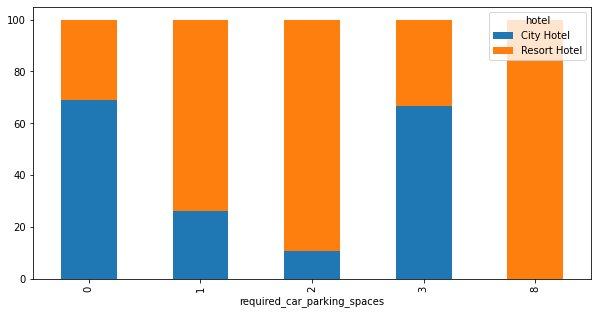

In [121]:
parking_space.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], stacked = True, figsize = (10,5))

In [122]:
hotels['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [123]:
booking_changes_cancelation = pd.crosstab(hotels['booking_changes'],hotels['is_canceled'])
booking_changes_cancelation

is_canceled,0,1
booking_changes,,
0,59923,41391
1,10894,1807
2,3039,766
3,783,144
4,309,67
5,98,20
6,45,18
7,28,3
8,13,4


In [124]:
changed_room_type = hotels.loc[hotels['reserved_room_type'] != hotels['assigned_room_type'],['hotel','is_canceled','reserved_room_type','assigned_room_type']]
A = pd.crosstab(changed_room_type['hotel'],changed_room_type['is_canceled'])
changed_room_type[hotels['is_canceled'] == 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,reserved_room_type,assigned_room_type
122,Resort Hotel,1,E,G
467,Resort Hotel,1,A,C
504,Resort Hotel,1,L,C
779,Resort Hotel,1,A,D
783,Resort Hotel,1,A,D
...,...,...,...,...
106117,City Hotel,1,A,K
108829,City Hotel,1,E,F
110280,City Hotel,1,D,K
111925,City Hotel,1,A,D


#gauri

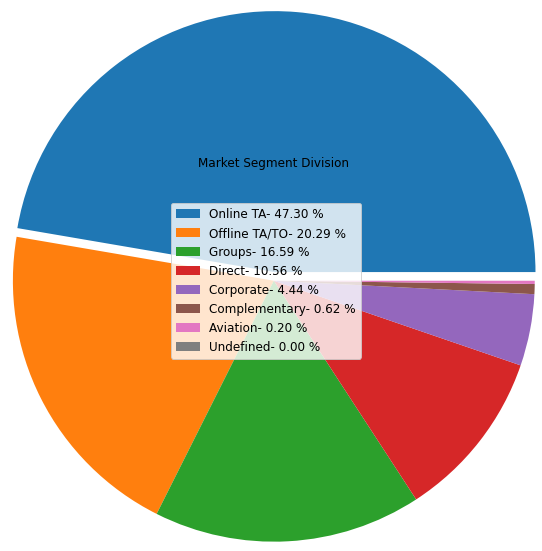

In [125]:
#most useful market segment
def make_pieplot(data,explode):
  req_data=dict(data.value_counts())
  marketing_options_names=np.array(list(req_data.keys()))
  marketing_options_values=np.array(list(req_data.values()))
  #print(marketing_options_values)
  percent=((marketing_options_values)/marketing_options_values.sum())*100.
  patches,texts=plt.pie(marketing_options_values,rotatelabels=True,radius= 3,explode=explode)
  plt.title("Market Segment Division")
  labels = ['{0}- {1:1.2f} %'.format(i,j) for i,j in zip(marketing_options_names, percent)]
  plt.legend(patches, labels, loc='center left',  fontsize=12)
make_pieplot(hotels["market_segment"],[0.1,0,0,0,0,0,0,0])

In [126]:
# to judge which agent is better 
segment_cancelled=pd.crosstab(hotels["is_canceled"],hotels["market_segment"])
segment_cancelled_percentage=segment_cancelled.copy()

In [127]:
segment_cancelled

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,185,646,4303,10672,7714,15908,35738,0
1,52,97,992,1934,12097,8311,20739,2


In [128]:
data=dict(hotels["market_segment"].value_counts())

In [129]:
for i in list(data.keys()):
  segment_cancelled_percentage[i][0]=(segment_cancelled[i][0]/data[i])*100
  segment_cancelled_percentage[i][1]=(segment_cancelled[i][1]/data[i])*100

In [130]:
segment_cancelled_percentage

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,78,86,81,84,38,65,63,0
1,21,13,18,15,61,34,36,100


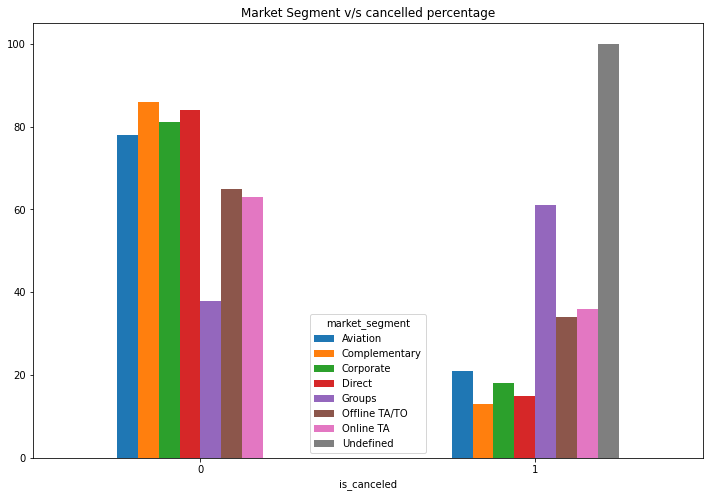

In [131]:

segment_cancelled_percentage.plot(kind="bar", figsize=(12,8),title="Market Segment v/s cancelled percentage", rot=0,)

In [132]:
segment_month=pd.crosstab(hotels["arrival_date_month"],hotels["market_segment"])
segment_month=pd.DataFrame(segment_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )

In [133]:
segment_month.columns

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined'],
      dtype='object', name='market_segment')

In [134]:
#segment_month

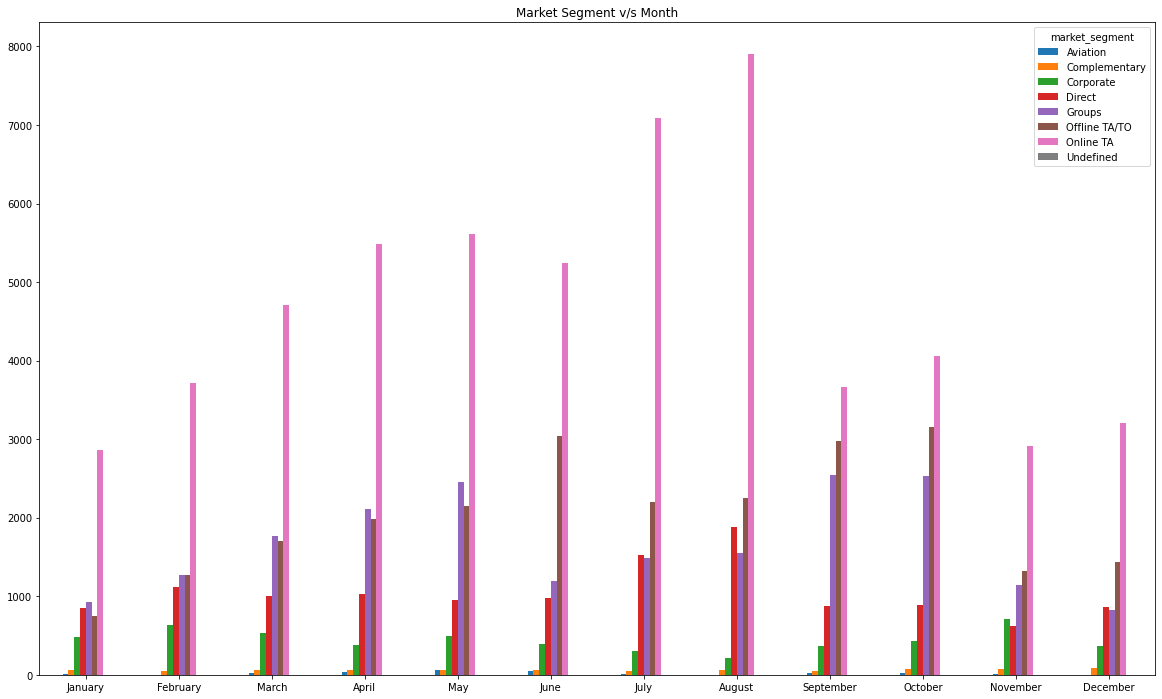

In [135]:
#ax=plt.figure(figsize=(8,6),facecolor='grey',edgecolor='orange')
segment_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)

In [136]:
segment_year=pd.crosstab(hotels["arrival_date_year"],hotels["market_segment"])
segment_year

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
arrival_date_year,,,,,,,,
2015,0,165,1171,2314,6100,6079,6165,2
2016,127,364,2562,5663,7857,12473,27661,0
2017,110,214,1562,4629,5854,5667,22651,0


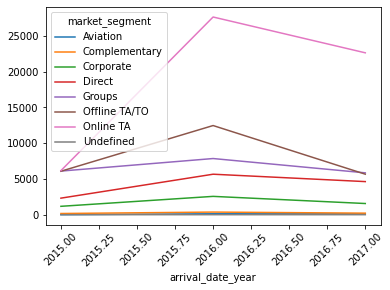

In [137]:
segment_year.plot(kind="line",rot=45)


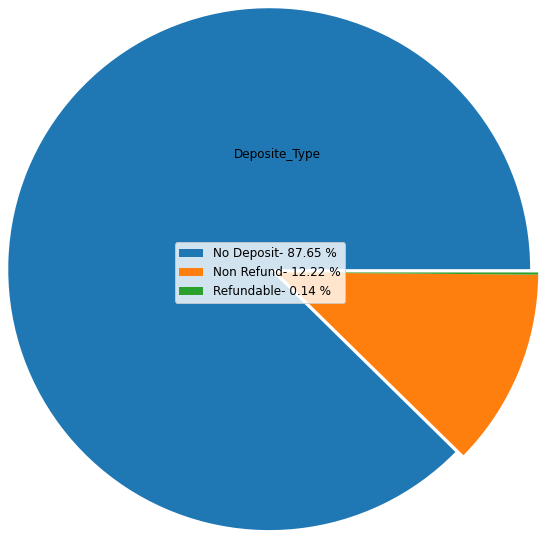

In [138]:

def make_pieplot(data,explode=[0,0,0,0,0,0]):
  req_data=dict(data.value_counts())
  marketing_options_names=np.array(list(req_data.keys()))
  marketing_options_values=np.array(list(req_data.values()))
  #print(marketing_options_values)
  percent=((marketing_options_values)/marketing_options_values.sum())*100.
  patches,texts=plt.pie(marketing_options_values,rotatelabels=True,radius= 3,explode=explode)
  plt.title("Deposite_Type")
  labels = ['{0}- {1:1.2f} %'.format(i,j) for i,j in zip(marketing_options_names, percent)]
  plt.legend(patches, labels, loc='center left',  fontsize=12)
make_pieplot(hotels["deposit_type"],[0.1,0,0])

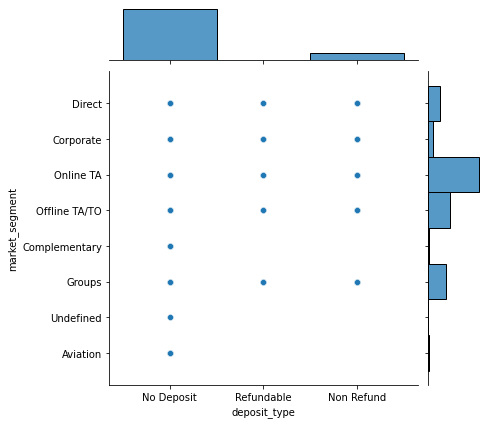

In [139]:
sns.jointplot(y="market_segment",x="deposit_type",data=hotels)

In [140]:
agents=hotels["agent"].value_counts()
top_agents=agents.iloc[0:10].index
agents_notreq=agents[agents<=3].index    #we do not require agents who are  not very active
agents_notreq
top_agents.shape

(10,)

In [141]:
#reserved room : to check which room is demanded most
demanded_room=hotels["reserved_room_type"].value_counts()
demanded_room

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

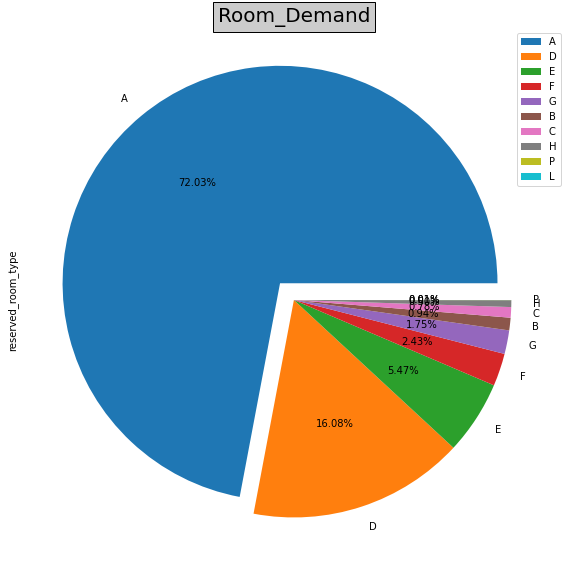

In [142]:
def make_pieplot(data,explode_):
  #explode_ = [0.05,0,0,0,0,0,0,0]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = list(dict(dict_data).keys()), autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title('Room_Demand',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
make_pieplot(hotels["reserved_room_type"],[0.1,0,0,0,0,0,0,0,0,0])

In [143]:
#in which month the tickets are cancelled the most: this is to make sure whether hotel can take an extra entry or not.
canceled_month=pd.crosstab(hotels["arrival_date_month"],hotels["is_canceled"])
canceled_month=pd.DataFrame(canceled_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )
canceled_month

is_canceled,0,1
January,4122,1807
February,5372,2696
March,6645,3149
April,6565,4524
May,7114,4677
June,6404,4535
July,7919,4742
August,8638,5239
September,6392,4116
October,6914,4246


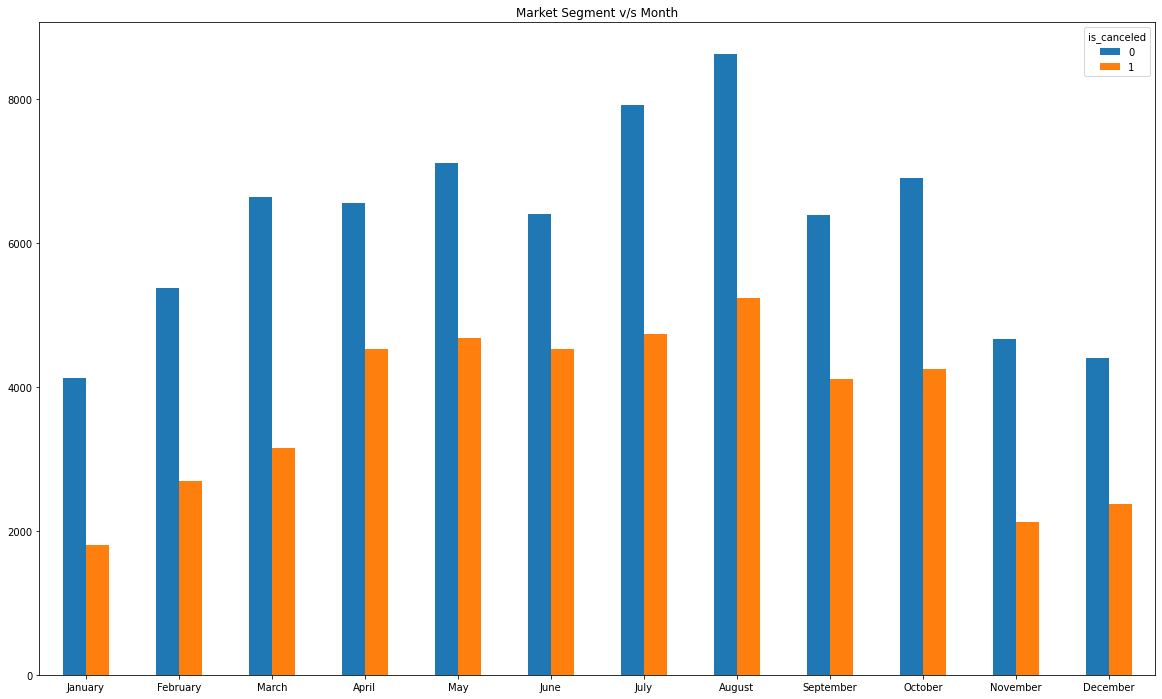

In [144]:
canceled_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)